# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1646]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [1647]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

_Using the Pandas groupby() function with the count() and sum() methods on PyBer DataFrame columns, get the total number of rides, total number of drivers, and the total fares for each city type. Then, calculate the average fare per ride and average fare per driver for each city type. Finally, add this data to a new DataFrame, then format the columns._

In [1648]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [1649]:
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [1650]:
# 2. Get the total drivers for each city type

total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]

In [1651]:
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [1652]:
#  3. Get the total amount of fares for each city type

total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [1653]:
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [1654]:
#  4. Get the average fare per ride for each city type. 

fare_average_by_type = total_fare_by_type / total_rides_by_type

_Calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides._

In [1655]:
fare_average_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [1656]:
# 5. Get the average fare per driver for each city type. 

average_fare_per_driver_by_type = total_fare_by_type / (total_drivers_by_type)

In [1657]:
average_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

_Calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers._

In [1658]:
# 6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, "Total Fares": total_fare_by_type, "Average Fare per Ride": fare_average_by_type, "Average Fare per Driver": average_fare_per_driver_by_type})

In [1659]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [1660]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [1661]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [1662]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, "Total Fares": total_fare_by_type, "Average Fare per Ride": fare_average_by_type, "Average Fare per Driver": average_fare_per_driver_by_type})
pyber_summary_df.index.name = None
pyber_summary_df.style.format({"Total Rides": "{:20,.0f}", "Total Drivers": "{:20,.0f}", "Total Fares": "${:20,.2f}", "Average Fare per Ride": "${:20,.2f}", "Average Fare per Driver": "${:20,.2f}"})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$ 4,327.93",$ 34.62,$ 55.49
Suburban,625,490,"$ 19,356.33",$ 30.97,$ 39.50
Urban,"1,625","2,405","$ 39,854.38",$ 24.53,$ 16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

_Using your Pandas skills and two new functions, pivot() andresample(), create a multiple-line graph that shows the total fares for each week by city type._

In [1663]:
# 1. Read the merged DataFrame

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1664]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fares_by_dates_per_city = pyber_data_df.groupby(["type","date"]).sum()["fare"]

In [1665]:
fares_by_dates_per_city

type      date               
Rural     2019-01-01 09:45:36    43.69
          2019-01-02 11:18:32    52.12
          2019-01-03 19:51:01    19.90
          2019-01-04 03:31:26    24.88
          2019-01-06 07:38:40    47.33
          2019-01-08 06:19:45    19.39
          2019-01-09 15:30:35    31.84
          2019-01-11 04:39:27    16.42
          2019-01-14 07:09:17    18.05
          2019-01-14 15:58:48    54.10
          2019-01-15 21:44:26    30.26
          2019-01-18 00:46:28    15.12
          2019-01-18 07:36:46    43.57
          2019-01-19 11:40:46    49.44
          2019-01-19 12:38:07    38.68
          2019-01-19 20:21:54    56.78
          2019-01-22 12:42:55    13.50
          2019-01-22 15:36:24    10.11
          2019-01-23 06:52:00    40.24
          2019-01-24 13:32:12    34.74
          2019-01-27 17:33:41    42.68
          2019-01-27 18:43:05    38.42
          2019-01-28 15:55:33    31.25
          2019-01-30 00:05:47    20.76
          2019-01-30 01:40:16    3

In [1666]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_dates_per_city = fares_by_dates_per_city.reset_index()

In [1667]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_dates_per_city_pivot = fares_by_dates_per_city.pivot(index="date", columns="type", values="fare")

In [1668]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fares_by_dates_per_city_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [1669]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_by_dates_per_city_pivot = fares_by_dates_per_city_pivot.loc['2019-01-01':'2019-04-29']

In [1670]:
fares_by_dates_per_city_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [1671]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_by_dates_per_city_pivot.index = pd.to_datetime(fares_by_dates_per_city_pivot.index)
fares_by_dates_per_city_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [1672]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_dates_per_city_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [1673]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_dates_per_city_pivot = fares_by_dates_per_city_pivot.resample("W").sum()
fares_by_dates_per_city_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [1674]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


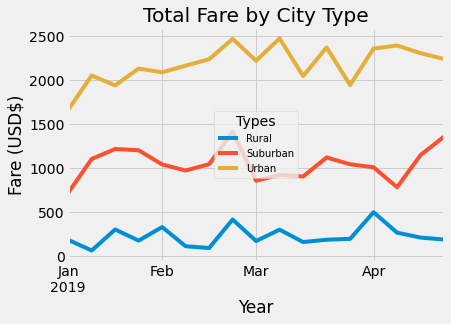

In [1675]:
#Chart the Graphs
fares_by_dates_per_city_pivot.plot()
plt.title("Total Fare by City Type")
plt.ylabel("Fare (USD$)")
plt.xlabel("Year")
lgnd = plt.legend(fontsize="10", loc="center", title="Types")
plt.savefig("analysis/Pyber_fare_summary.png")